<a href="https://colab.research.google.com/github/rickwag/ML/blob/main/Support_Tickets_Classification(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##SVM
### How SVMs work

SVM work by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable. A separator between the categories is found, then the data are transformed in such a way that the separator could be drawn as a hyperplane. Following this, characteristics of new data can be used to predict the group to which a new record should belong.

In [1]:
## data acquisation
data_url = "/content/sample_data/all_tickets.csv"

In [2]:
import pandas as pd

df = pd.read_csv(data_url)

In [3]:
df.head(5)

,title,body,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact
0,NaN,hi since recruiter lead permission approve req...,1,4,2,21,71,3,4
1,connection with icon,icon dear please setup icon per icon engineers...,1,6,22,7,26,3,4
2,work experience user,work experience user hi work experience studen...,1,5,13,7,32,3,4
3,requesting for meeting,requesting meeting hi please help follow equip...,1,5,13,7,32,3,4
4,reset passwords for external accounts,re expire days hi ask help update passwords co...,1,4,2,76,4,3,4


In [4]:
df["ticket_type"].unique()

array([1, 0])

In [5]:
df.shape

(48549, 9)

## Data preprocessing

In [7]:
#convert into lowercase
df["body"] = [entry.lower() for entry in df["body"]]

df.head(5)

,title,body,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact
0,NaN,hi since recruiter lead permission approve req...,1,4,2,21,71,3,4
1,connection with icon,icon dear please setup icon per icon engineers...,1,6,22,7,26,3,4
2,work experience user,work experience user hi work experience studen...,1,5,13,7,32,3,4
3,requesting for meeting,requesting meeting hi please help follow equip...,1,5,13,7,32,3,4
4,reset passwords for external accounts,re expire days hi ask help update passwords co...,1,4,2,76,4,3,4


In [8]:
#tokenization
import nltk
nltk.download("punkt")

from nltk.tokenize import word_tokenize

df["body"] = [word_tokenize(entry) for entry in df["body"]]

df.head(5)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,title,body,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact
0,NaN,"[hi, since, recruiter, lead, permission, appro...",1,4,2,21,71,3,4
1,connection with icon,"[icon, dear, please, setup, icon, per, icon, e...",1,6,22,7,26,3,4
2,work experience user,"[work, experience, user, hi, work, experience,...",1,5,13,7,32,3,4
3,requesting for meeting,"[requesting, meeting, hi, please, help, follow...",1,5,13,7,32,3,4
4,reset passwords for external accounts,"[re, expire, days, hi, ask, help, update, pass...",1,4,2,76,4,3,4


In [13]:
#stopwords removal and lemmatization
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("omw-1.4")

lemmatizer = WordNetLemmatizer()

for index, doc in enumerate(df["body"]):
  new_doc = []
  for token in doc:
    if token not in stopwords.words("english"):
      token = lemmatizer.lemmatize(token)
      new_doc.append(token)
  
  df.loc[index, "text_final"] = str(new_doc)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [14]:
df.head(5)

,title,body,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact,text_final
0,NaN,"[hi, since, recruiter, lead, permission, appro...",1,4,2,21,71,3,4,"['hi', 'since', 'recruiter', 'lead', 'permissi..."
1,connection with icon,"[icon, dear, please, setup, icon, per, icon, e...",1,6,22,7,26,3,4,"['icon', 'dear', 'please', 'setup', 'icon', 'p..."
2,work experience user,"[work, experience, user, hi, work, experience,...",1,5,13,7,32,3,4,"['work', 'experience', 'user', 'hi', 'work', '..."
3,requesting for meeting,"[requesting, meeting, hi, please, help, follow...",1,5,13,7,32,3,4,"['requesting', 'meeting', 'hi', 'please', 'hel..."
4,reset passwords for external accounts,"[re, expire, days, hi, ask, help, update, pass...",1,4,2,76,4,3,4,"['expire', 'day', 'hi', 'ask', 'help', 'update..."


In [15]:
#training and testing split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df["text_final"], df["ticket_type"], test_size=.2)

In [16]:
#word vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

Tfid_vectorizer = TfidfVectorizer(max_features = 5000)
Tfid_vectorizer.fit(df["text_final"])

X_train = Tfid_vectorizer.transform(X_train)
X_test = Tfid_vectorizer.transform(X_test)

In [17]:
#model creation (SVM)
from sklearn import svm

svm_model = svm.SVC(kernel="linear", gamma="auto")

In [18]:
#model training
svm_model.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [24]:
#model evaluation
from sklearn.metrics import f1_score

print(f"accuracy => {svm_model.score(X_test, y_test)}")
print(f"f1 score => {f1_score(y_test, predictions)}")

accuracy => 0.9859938208032956
f1 score => 0.9902926481084939


In [20]:
predictions = svm_model.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)
cm

array([[2637,  109],
       [  27, 6937]])

Text(33.0, 0.5, 'truth')

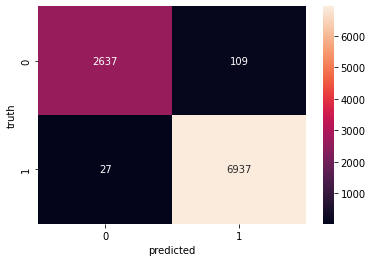

In [22]:
import seaborn as sb
import matplotlib.pyplot as plt

sb.heatmap(cm, annot = True, fmt = "d")

plt.xlabel("predicted")
plt.ylabel("truth")